In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key

In [2]:
# Locate CSV files and convert to dataframes
STATE_DATA_PATH = "Resources/MN_2020_ADI_9 Digit Zip Code_v3.2.csv"
LOCAL_DATA_PATH = "Resources/Local_Repository_Data.csv"
PT_DATA_PATH = "Resources/Patient_Data.csv"

state_df = pd.read_csv(STATE_DATA_PATH)
local_df = pd.read_csv(LOCAL_DATA_PATH)
pt_df = pd.read_csv(PT_DATA_PATH)

C:\Users\jkaum\AppData\Local\Temp\ipykernel_33116\2531968484.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  state_df = pd.read_csv(STATE_DATA_PATH)


# DATA CLEANING
---
state_df cleaning

In [3]:
state_df.head()

,ZIP_4,GISJOIN,FIPS,ADI_NATRANK,ADI_STATERANK,TYPE
0,550010002,G27016300711022,2.716307e+11,12,1,
1,550010003,G27016300711022,2.716307e+11,12,1,
2,550010004,G27016300711022,2.716307e+11,12,1,
3,550010001,G27016300711022,2.716307e+11,12,1,
4,550010015,G27016300711022,2.716307e+11,12,1,


In [4]:
# Number of zip codes in state_df
print(f"There are {state_df.shape[0]} MN zip codes in state_df")

There are 1207314 MN zip codes in state_df


In [5]:
# Drop unwanted columns from state_df
clean_state_df = state_df.drop(["GISJOIN", "FIPS", "TYPE"], axis=1)
clean_state_df.head()

,ZIP_4,ADI_NATRANK,ADI_STATERANK
0,550010002,12,1
1,550010003,12,1
2,550010004,12,1
3,550010001,12,1
4,550010015,12,1


In [6]:
# Find bad data to drop
clean_state_df["ADI_STATERANK"].unique()

array(['1', '4', '3', '6', 'GQ-PH', '2', '5', '9', '8', '7', 'GQ', '10',
       'PH', nan, 8, 10, 7, 4, 9, 5, 6, 3, 1], dtype=object)

In [7]:
# Drop bad data
clean_state_df = clean_state_df.loc[(clean_state_df["ADI_STATERANK"] != "GQ") &
                                    (state_df["ADI_STATERANK"] != "PH") &
                                    (state_df["ADI_STATERANK"] != "GQ-PH")]
clean_state_df["ADI_STATERANK"].unique()

array(['1', '4', '3', '6', '2', '5', '9', '8', '7', '10', nan, 8, 10, 7,
       4, 9, 5, 6, 3, 1], dtype=object)

In [8]:
# Drop NaN data
clean_state_df = clean_state_df.dropna()

In [9]:
# Confirm that all bad data is dropped from ADI_STATERANK column
clean_state_df["ADI_STATERANK"].unique()

array(['1', '4', '3', '6', '2', '5', '9', '8', '7', '10', 8, 10, 7, 4, 9,
       5, 6, 3, 1], dtype=object)

In [10]:
# Confirm that all bad data is dropped from ADI_NATRANK column
clean_state_df["ADI_NATRANK"].unique()

array(['12', '11', '16', '35', '10', '39', '31', '50', '27', '42', '45',
       '22', '37', '74', '43', '62', '46', '40', '47', '34', '56', '67',
       '68', '69', '66', '70', '63', '41', '48', '38', '36', '57', '28',
       '25', '33', '29', '26', '30', '19', '55', '32', '49', '20', '18',
       '24', '23', '53', '54', '97', '14', '59', '15', '21', '17', '44',
       '73', '64', '81', '61', '58', '76', '60', '13', '9', '51', '8',
       '98', '5', '75', '86', '72', '65', '96', '84', '95', '77', '71',
       '82', '83', '6', '92', '52', '89', '80', '79', '78', '7', '99',
       '4', '100', '3', '2', '91', '85', '87', '93', '88', '94', '90', 60,
       62, 61, 96, 55, 63, 59, 39, 67, 44, 69, 42, 43, 74, 64, 79, 81, 70,
       77, 54, 68, 51, 46, 58, 52, 72, 82, 75, 80, 88, 56, 76, 45, 34, 90,
       65, 99, 40, 36, 78, 84, 83, 73, 86, 66, 31, 53, 50, 85],
      dtype=object)

In [11]:
# Reset the index after dropping rows
clean_state_df = clean_state_df.reset_index(drop=True)
clean_state_df.head()

,ZIP_4,ADI_NATRANK,ADI_STATERANK
0,550010002,12,1
1,550010003,12,1
2,550010004,12,1
3,550010001,12,1
4,550010015,12,1


In [12]:
# Almost 30,000 rows were dropped during data cleaning
print(f"{state_df.shape[0] - clean_state_df.shape[0]} rows were dropped from state_df during data cleaning.")

29462 rows were dropped from state_df during data cleaning.


In [13]:
# Rename zip code column name to match the pt_data_df
clean_state_df = clean_state_df.rename(columns={"ZIP_4": "Zip Code (9-digit)"})
clean_state_df.head()

,Zip Code (9-digit),ADI_NATRANK,ADI_STATERANK
0,550010002,12,1
1,550010003,12,1
2,550010004,12,1
3,550010001,12,1
4,550010015,12,1


---
local_df cleaning

In [14]:
local_df.head()

,Local Repository ID,Zip Code (5-digit),Zip Code (9-digit),Established
0,101,55407,554074563,7/9/2021
1,102,56377,563771274,7/1/2021
2,103,55454,554544400,6/10/2021
3,104,55416,554162527,7/15/2022
4,105,56441,564411422,7/21/2022


In [15]:
# Print the number of repositories
print(f"RoundtableRx has {local_df.shape[0]} local repositories where patients can get their medications.")

RoundtableRx has 22 local repositories where patients can get their medications.


In [16]:
# Drop unwanted columns
clean_local_df = local_df.drop("Established", axis=1)
clean_local_df.head()

,Local Repository ID,Zip Code (5-digit),Zip Code (9-digit)
0,101,55407,554074563
1,102,56377,563771274
2,103,55454,554544400
3,104,55416,554162527
4,105,56441,564411422


In [17]:
# Check for bad data
clean_local_df["Zip Code (5-digit)"].unique()

array([55407, 56377, 55454, 55416, 56441, 56401, 56636, 56501, 55063,
       55807, 55470, 55987, 55404, 55104, 55409, 55054, 55303, 55805],
      dtype=int64)

In [18]:
# Check for bad data
clean_local_df["Zip Code (9-digit)"].unique()

array([554074563, 563771274, 554544400, 554162527, 564411422, 564013575,
       566368779, 565013503, 550636026, 564013054, 558072730, 554071131,
       559876435, 558072737, 554043074, 551044201, 554091304, 554044515,
       550545483, 554042923, 553035566, 558051901], dtype=int64)

----
pt_df cleaning

In [19]:
pt_df.head()

,Local Repository ID,Patient ID,Zip Code (5-digit),Zip Code (9-digit),Date Started or Renewed
0,113,2001,55987,559874346,1/30/2023
1,115,2002,55429,554292726,5/18/2021
2,115,2003,??,??,6/2/2021
3,115,2004,55407,554071135,8/20/2021
4,115,2005,55428,554282966,7/22/2022


In [20]:
# RoundtableRx serves 133 unique patients
print(f"RoundtableRx serves {pt_df.shape[0]} unique patients.")

RoundtableRx serves 133 unique patients.


In [21]:
# Drop unwanted columns
clean_pt_df = pt_df.drop("Date Started or Renewed", axis=1)
clean_pt_df.head()

,Local Repository ID,Patient ID,Zip Code (5-digit),Zip Code (9-digit)
0,113,2001,55987,559874346
1,115,2002,55429,554292726
2,115,2003,??,??
3,115,2004,55407,554071135
4,115,2005,55428,554282966


In [22]:
# Check for bad data
clean_pt_df["Zip Code (5-digit)"].unique()

array(['55987', '55429', '??', '55407', '55428', '55417', '55434',
       '55418', '55413', '55423', '56679', '55792', '55810', '55720',
       '56649', '55804', '55805', '56401', '55807', '55724', '55705',
       '55812', '55795', '56470', '55803', '56636', '55753', '56571',
       '56573', '55797', '55744', '55811', '56484', '55760', '55782',
       '56450', '56672', '56501', '55779', '56473', '56474', '56554',
       '56637', '56544', '56449', '55722', '56655', '55020', '55044',
       '55088', '55054', '55378', '55057', '55616', '55454', '55106',
       '55406', '55303', '55126', '55433', '55343', '55304', '55025',
       '55387', '55117', '55346', '55110', '55362', '55404', '56444',
       '56441', '55119'], dtype=object)

In [23]:
# Check for bad data
clean_pt_df["Zip Code (9-digit)"].unique()

array(['559874346', '554292726', '??', '554071135', '554282966',
       '554172816', '554195500', '554072203', '554184420', '554131969',
       '554234333', '566790093', '557922844', '558109576', '557201311',
       '566493402', '558041646', '557922200', '558052044', '564012737',
       '566492805', '558072658', '557248533', '557051441', '558051823',
       '558043301', '558121751', '557953076', '558052073', '564701387',
       '558072542', '558043061', '558039436', '566360179', '557530641',
       '565719409', '565739010', '566363071', '557978718', '557442177',
       '557248209', '558111236', '564842171', '557605894', '557820385',
       '564509694', '566724575', '565012449', '558032034', '557797006',
       '566360395', '565013203', '566362044', '564732139', '558102022',
       '557923527', '558041806', '558121720', '558115323', '564014402',
       '566362205', '564746164', '565549002', '566372091', '565012909',
       '565448547', '558071922', '558071908', '558031945', '564491107',

In [24]:
# Drop bad data
clean_pt_df = clean_pt_df.loc[(clean_pt_df["Zip Code (9-digit)"] != "??") & (clean_pt_df["Zip Code (5-digit)"] != "??")]
clean_pt_df.head()

,Local Repository ID,Patient ID,Zip Code (5-digit),Zip Code (9-digit)
0,113,2001,55987,559874346
1,115,2002,55429,554292726
3,115,2004,55407,554071135
4,115,2005,55428,554282966
5,115,2006,55417,554172816


In [25]:
# Reset the index after dropping rows
clean_pt_df = clean_pt_df.reset_index(drop=True)
clean_pt_df.head()

,Local Repository ID,Patient ID,Zip Code (5-digit),Zip Code (9-digit)
0,113,2001,55987,559874346
1,115,2002,55429,554292726
2,115,2004,55407,554071135
3,115,2005,55428,554282966
4,115,2006,55417,554172816


In [26]:
# Print number of pts lost during data cleaning
print(f"{pt_df.shape[0] - clean_pt_df.shape[0]} patients were dropped during data cleaning.")

4 patients were dropped during data cleaning.


# Data Merging

In [27]:
# Before merging clean_pt_df and clean_state_df, ensure that common column is of the same dtype
clean_pt_df['Zip Code (9-digit)'] = clean_pt_df['Zip Code (9-digit)'].astype(int)
clean_state_df['Zip Code (9-digit)'] = clean_state_df['Zip Code (9-digit)'].astype(int)

In [28]:
# Merge clean_pt_df and clean_state_df so that we can get the ADI rank of each patient
pt_adi_df = pd.merge(clean_pt_df,clean_state_df, how="inner", on=["Zip Code (9-digit)", "Zip Code (9-digit)"])
pt_adi_df.head()

,Local Repository ID,Patient ID,Zip Code (5-digit),Zip Code (9-digit),ADI_NATRANK,ADI_STATERANK
0,113,2001,55987,559874346,77,10
1,115,2002,55429,554292726,62,8
2,115,2004,55407,554071135,57,7
3,115,2005,55428,554282966,63,8
4,115,2006,55417,554172816,84,10


In [29]:
# Print number of pts lost during data merging
print(f"{clean_pt_df.shape[0] - pt_adi_df.shape[0]} patients were dropped during data merging.")

2 patients were dropped during data merging.


In [30]:
# Determine total number of patients with ADI ranks we can analyze
total_pts = pt_adi_df["Patient ID"].count()
print(f"ADI ranks are available for {total_pts} of RoundtableRx's patients.")

ADI ranks are available for 127 of RoundtableRx's patients.


In [31]:
# Before merging clean_local_df and clean_state_df, ensure that common column is of the same dtype
clean_local_df['Zip Code (9-digit)'] = clean_local_df['Zip Code (9-digit)'].astype(int)

In [32]:
# Merge clean_local_df and clean_state_df so that we can get the ADI rank of each local repository
local_adi_df = pd.merge(clean_local_df,clean_state_df, how="left", on=["Zip Code (9-digit)", "Zip Code (9-digit)"])
local_adi_df

,Local Repository ID,Zip Code (5-digit),Zip Code (9-digit),ADI_NATRANK,ADI_STATERANK
0,101,55407,554074563,44,5
1,102,56377,563771274,65,8
2,103,55454,554544400,NaN,NaN
3,104,55416,554162527,41,5
4,105,56441,564411422,58,7
5,106,56401,564013575,84,10
6,107,56636,566368779,90,10
7,108,56501,565013503,75,9
8,109,55063,550636026,63,8
9,110,56401,564013054,73,9


1.using geoapify (https://apidocs.geoapify.com/docs/geocoding/forward-geocoding/#geocode-zipcodes) add lat and lon columns as well get a county column to pt_adi_df and local_adi_df. get county column added to clean_state_df.
    - Ayan
    Travis

make the maps

2. get mean, mode for pt_adi_df ADI_STATERANK and ADI_NATRANK
    - Kokoe

make bar charts y = # of pts, x = ADIs core for pt_adi_df. state ranks only
    - Roli

3. pie chart ADI scores
    - Joanna

4. health access / health outcomes vs adi score per county

to create a new branch:     git checkout -b new-branch-name
to push to a branch:        git push origin new-branch-name

10 AM GROUP ON SATURDAY

2:30 GROUP ON SATURDAY


In [33]:
# Set data type of ADI ranks to integers so we can perform statistical analysis
pt_adi_df['ADI_STATERANK'] = pt_adi_df['ADI_STATERANK'].astype(int)
pt_adi_df['ADI_NATRANK'] = pt_adi_df['ADI_NATRANK'].astype(int)

In [34]:
# Separating pt ADI ranks into 3 bins
pt_ADI_groups = pt_adi_df.copy()
bins_3 = [0, 4.9, 7.9, 10]
labels_3 = ["1 to 4", "5 to 7", "8 to 10"]
pt_ADI_groups["State ADI Rank (3 Groups)"] = pd.cut(pt_ADI_groups["ADI_STATERANK"], bins=bins_3,
                                                    labels=labels_3, include_lowest=True)

In [35]:
# Separating pt ADI ranks into 2 bins
bins_2 = [0, 4.9, 10]
labels_2 = ["below 5", "5 to 10"]
pt_ADI_groups["State ADI Rank (2 Groups)"] = pd.cut(pt_ADI_groups["ADI_STATERANK"], bins=bins_2,
                                                    labels=labels_2, include_lowest=True)

In [36]:
pt_ADI_groups.head()

,Local Repository ID,Patient ID,Zip Code (5-digit),Zip Code (9-digit),ADI_NATRANK,ADI_STATERANK,State ADI Rank (3 Groups),State ADI Rank (2 Groups)
0,113,2001,55987,559874346,77,10,8 to 10,5 to 10
1,115,2002,55429,554292726,62,8,8 to 10,5 to 10
2,115,2004,55407,554071135,57,7,5 to 7,5 to 10
3,115,2005,55428,554282966,63,8,8 to 10,5 to 10
4,115,2006,55417,554172816,84,10,8 to 10,5 to 10


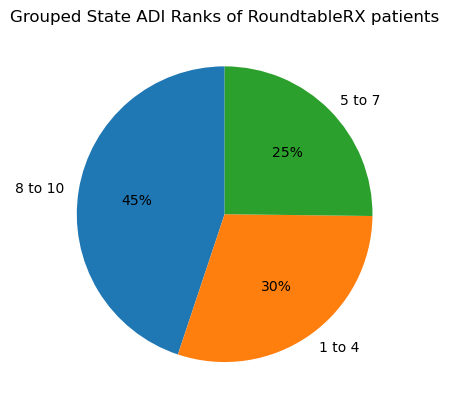

In [37]:
# Pie chart for 3 bins of pt ADI ranks
pts_per_ADI_group_3 = pt_ADI_groups["State ADI Rank (3 Groups)"].value_counts()
pts_per_ADI_group_3.plot(kind="pie", ylabel="", title="Grouped State ADI Ranks of RoundtableRX patients", startangle = 90,
                       autopct="%1.0f%%")
plt.show()

In [38]:
# Print stats for pts grouped into three ADI rank groups
pts_1to4 = pt_ADI_groups["State ADI Rank (3 Groups)"].loc[pt_ADI_groups["State ADI Rank (3 Groups)"] == "1 to 4"].count()
pts_5to7 = pt_ADI_groups["State ADI Rank (3 Groups)"].loc[pt_ADI_groups["State ADI Rank (3 Groups)"] == "5 to 7"].count()
pts_8to10 = pt_ADI_groups["State ADI Rank (3 Groups)"].loc[pt_ADI_groups["State ADI Rank (3 Groups)"] == "8 to 10"].count()

percent_1to4 = round(pts_1to4/total_pts *100)
percent_5to7 = round(pts_5to7/total_pts *100)
percent_8to10 = round(pts_8to10/total_pts *100)

print(f"{percent_1to4}% of RoundtableRx's patients have an ADI rank less than 5.")
print(f"{percent_5to7}% of RoundtableRx's patients have an ADI rank of 5, 6, or 7")
print(f"{percent_8to10}% of RoundtableRx's patients have an ADI rank of 8, 9, or 10")

30% of RoundtableRx's patients have an ADI rank less than 5.
25% of RoundtableRx's patients have an ADI rank of 5, 6, or 7
45% of RoundtableRx's patients have an ADI rank of 8, 9, or 10


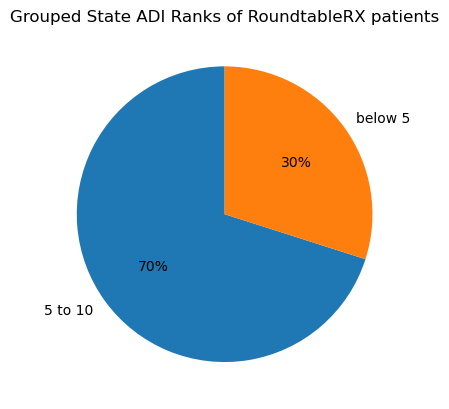

In [39]:
# Pie chart for 2 bins of pt ADI ranks
pts_per_ADI_group_2 = pt_ADI_groups["State ADI Rank (2 Groups)"].value_counts()
pts_per_ADI_group_2.plot(kind="pie", ylabel="", title="Grouped State ADI Ranks of RoundtableRX patients", startangle = 90,
                       autopct="%1.0f%%")
plt.show()

In [40]:
# Print stats for pts grouped into two ADI rank groups
pts_below_5 = pt_ADI_groups["State ADI Rank (2 Groups)"].loc[pt_ADI_groups["State ADI Rank (2 Groups)"] == "5 to 10"].count()
pts_above_5 = pt_ADI_groups["State ADI Rank (2 Groups)"].loc[pt_ADI_groups["State ADI Rank (2 Groups)"] == "below 5"].count()
percent_below_5 = round(pts_below_5/total_pts *100)
percent_above_5 = round(pts_above_5/total_pts *100)
print(f"{percent_below_5}% of RoundtableRx's patients have an ADI rank less than 5.")
print(f"{percent_above_5}% of RoundtableRx's patients have an ADI rank of 5 or above")

70% of RoundtableRx's patients have an ADI rank less than 5.
30% of RoundtableRx's patients have an ADI rank of 5 or above
